In [22]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("RJT1990/GeneralThoughtArchive")

In [24]:
import pandas as pd
import numpy as np

In [37]:
df = pd.DataFrame(ds['train'])
print(df.head())

   question_id                                       question_url  \
0       806845  https://gr.inc/question/how-do-the-neural-resp...   
1      1730456  https://gr.inc/question/lets-consider-some-arr...   
2      3236068  https://gr.inc/question/what-are-the-primary-c...   
3      1717140  https://gr.inc/question/consider-a-football-to...   
4      3235833  https://gr.inc/question/given-the-context-of-h...   

                                            question  \
0     How do the neural respiratory centers operate?   
1  Let's consider some array A. The following alg...   
2  What are the primary criticisms Aristotle rais...   
3  Consider a football tournament where n teams p...   
4  Given the context of Heidegger's philosophy, p...   

                                    reference_answer prev_messages  \
0  In the medulla oblongata, respiratory neurons ...          None   
1                                               None          None   
2  Aristotle's criticisms of Plato's t

In [38]:
df.shape

(430788, 14)

In [39]:
# Check data types, non-null counts, memory usage
print(df.info())
print("\nColumn names:")
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430788 entries, 0 to 430787
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   question_id               430788 non-null  int64  
 1   question_url              430788 non-null  object 
 2   question                  430788 non-null  object 
 3   reference_answer          306178 non-null  object 
 4   prev_messages             102234 non-null  object 
 5   model_name                430788 non-null  object 
 6   model_answer              430788 non-null  object 
 7   model_reasoning           428151 non-null  object 
 8   task                      430788 non-null  object 
 9   question_license          429474 non-null  object 
 10  question_source           430788 non-null  object 
 11  community_answer_score    430788 non-null  int64  
 12  community_question_score  430788 non-null  int64  
 13  verifier_score            338377 non-null  f

In [40]:
# Missing value analysis
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nMissing value percentages:")
print((df.isnull().sum() / len(df)) * 100)


Missing values per column:
question_id                      0
question_url                     0
question                         0
reference_answer            124610
prev_messages               328554
model_name                       0
model_answer                     0
model_reasoning               2637
task                             0
question_license              1314
question_source                  0
community_answer_score           0
community_question_score         0
verifier_score               92411
dtype: int64

Missing value percentages:
question_id                  0.000000
question_url                 0.000000
question                     0.000000
reference_answer            28.926061
prev_messages               76.268141
model_name                   0.000000
model_answer                 0.000000
model_reasoning              0.612134
task                         0.000000
question_license             0.305022
question_source              0.000000
community_answer_score 

In [41]:
drop_columns = ['question_id','question_url','question_license']
df = df.drop(columns=drop_columns)

In [42]:
unique_values = df['question_source'].unique()
unique_values

array(['General/VNet', 'BAAI/TACO', 'Meta/natural_reasoning',
       'Numina/NuminaMath', 'CogStack/NHSQA',
       'FreedomIntelligence/medical-o1-verifiable-problem',
       'OpenLeecher/lmsys_chat_1m_clean', 'INFLYTECH/SCP-116K',
       'OpenAssistant/oasst1', 'GlaiveAI/glaive-code-assistant', 'panpan',
       'General/compmath', 'Hendryks/MATH',
       'databricks/databricks-dolly-15k', 'CodeParrot/APPS',
       'MatrixStudio/Codeforces-Python-Submissions',
       'Google/code_contests', 'RJT1990', 'dario',
       'RJT1990/history-of-science', 'sidoneytemporary977',
       'chengxitaylor', 'OpenAI/GSM8K', 'smirki/UI_Reasoning_Dataset',
       'INK-USC/RiddleSense', 'Tim_tom_0', 'Jarius',
       'RJT1990/brainteasers', 'booby', 'RJT1990/ww2history',
       'chengxitaylor/fashion', 'RJT1990/fashion',
       'anon8231489123/ShareGPT_Vicuna_unfiltered'], dtype=object)

In [43]:
# Check if critical text fields are populated
print("\nSample of model_reasoning (first 3 rows):")
for i in range(min(3, len(df))):
    print(f"\n--- Row {i} ---")
    print(df.iloc[i]['model_reasoning'][:500])  # First 500 chars


Sample of model_reasoning (first 3 rows):

--- Row 0 ---
Okay, so I need to figure out how the neural respiratory centers work. Let me start by recalling what I know about breathing and the nervous system. I remember that breathing is controlled by parts of the brain, right? There's the medulla and the pons mentioned in some biology classes. But wait, how exactly do they work together?

First, there's the medulla oblongata. I think that's the primary control center. It has groups of neurons called the dorsal respiratory group and the ventral respirato

--- Row 1 ---
Okay, let's see. I need to find the maximum possible force of an array after reordering some elements. The force is calculated by summing the squares of the lengths of consecutive equal elements. So the problem is, given the array generated by a specific recurrence relation, how can I rearrange its elements to maximize this sum of squares?

Hmm. The key here is that the optimal arrangement groups as many same elements as p

In [44]:
# Check reasoning field completeness
print("\nModel reasoning missing:")
print(df['model_reasoning'].isnull().sum())

print("\nReference answer missing:")
print(df['reference_answer'].isnull().sum())

print("\nPrev_messages present:")
print(df['prev_messages'].notna().sum())

# Apply cleaning strategy in correct order:
# 1. Keep only single-turn questions (prev_messages is NULL)
df_clean = df[df['prev_messages'].isnull()].copy()
print(f"\nAfter filtering single-turn questions: {df_clean.shape}")

# 2. Drop rows without reference_answer (can't create labels)
df_clean = df_clean[df_clean['reference_answer'].notna()].copy()
print(f"After removing missing reference_answer: {df_clean.shape}")

# 3. Drop rows without model_reasoning (can't extract features)
df_clean = df_clean[df_clean['model_reasoning'].notna()].copy()
print(f"After removing missing model_reasoning: {df_clean.shape}")

# 4. Impute verifier_score by KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_clean['verifier_score'] = imputer.fit_transform(df_clean[['verifier_score']].values.reshape(-1, 1))
print(f"After imputing verifier_score: {df_clean.shape}")



print(f"\nFinal cleaned dataset size: {df_clean.shape}")



Model reasoning missing:
2637

Reference answer missing:
124610

Prev_messages present:
102234

After filtering single-turn questions: (328554, 11)
After removing missing reference_answer: (306178, 11)
After removing missing model_reasoning: (303696, 11)
After imputing verifier_score: (303696, 11)

Final cleaned dataset size: (303696, 11)


In [14]:
import re

In [ ]:
# === FEATURE FAMILY 1: Length/Shape Features ===
# Extract from model_reasoning (NOT model_answer)
print("Extracting Feature Family 1: Length/Shape...")

# Token count
df_clean['feat_token_count'] = df_clean['model_reasoning'].apply(lambda x: len(str(x).split()))

# Sentence count (periods, exclamation, question marks)
df_clean['feat_sentence_count'] = df_clean['model_reasoning'].apply(
    lambda x: len(re.findall(r'[.!?]+', str(x)))
)

# Step markers (1., 2., Step 1, etc.)
df_clean['feat_step_markers'] = df_clean['model_reasoning'].apply(
    lambda x: len(re.findall(r'\b(?:step\s*\d+|^\d+\.|\n\d+\.)', str(x).lower()))
)

# Average sentence length
df_clean['feat_avg_sentence_len'] = (df_clean['feat_token_count'] / 
                                      (df_clean['feat_sentence_count'] + 1))

# Max sentence length (split by periods, find longest)
def max_sent_len(text):
    sentences = re.split(r'[.!?]+', str(text))
    if not sentences:
        return 0
    return max(len(s.split()) for s in sentences)

df_clean['feat_max_sentence_len'] = df_clean['model_reasoning'].apply(max_sent_len)

print(f"✓ Created {5} length/shape features")

Extracting Feature Family 1: Length/Shape...
✓ Created 5 length/shape features


In [16]:
# === FEATURE FAMILY 2: Math Footprint ===
print("Extracting Feature Family 2: Math Footprint...")

# LaTeX operator counts (sum, frac, etc.)
df_clean['feat_latex_operators'] = df_clean['model_reasoning'].apply(
    lambda x: len(re.findall(r'\\(?:frac|sum|int|times|div|sqrt|cdot|pm|infty)', str(x)))
)

# Digit ratio (proportion of characters that are digits)
df_clean['feat_digit_ratio'] = df_clean['model_reasoning'].apply(
    lambda x: sum(c.isdigit() for c in str(x)) / (len(str(x)) + 1)
)

# Equation sign density (=, +, -, *, /)
df_clean['feat_equation_signs'] = df_clean['model_reasoning'].apply(
    lambda x: len(re.findall(r'[=+\-*/]', str(x)))
)

# Operator variety (unique math operators)
def operator_variety(text):
    operators = set(re.findall(r'[+\-*/=<>≤≥]', str(text)))
    return len(operators)

df_clean['feat_operator_variety'] = df_clean['model_reasoning'].apply(operator_variety)

# Code block presence (``````)
df_clean['feat_has_code_block'] = df_clean['model_reasoning'].apply(
    lambda x: 1 if '```' in str(x) else 0
)

print(f"✓ Created {5} math footprint features")


Extracting Feature Family 2: Math Footprint...
✓ Created 5 math footprint features


In [17]:
# === FEATURE FAMILY 3: Logic Cues ===
print("Extracting Feature Family 3: Logic Cues...")

# Connective words (because, therefore, thus, so, hence)
logic_connectives = ['because', 'therefore', 'thus', 'hence', 'since', 'consequently']
df_clean['feat_logic_connectives'] = df_clean['model_reasoning'].apply(
    lambda x: sum(str(x).lower().count(word) for word in logic_connectives)
)

# Self-correction markers (wait, actually, correction, mistake)
correction_words = ['wait', 'actually', 'correction', 'mistake', 'error', 'wrong']
df_clean['feat_self_corrections'] = df_clean['model_reasoning'].apply(
    lambda x: sum(str(x).lower().count(word) for word in correction_words)
)

# Contradiction indicators (but, however near numbers)
def contradictions_near_numbers(text):
    text_lower = str(text).lower()
    # Find "but" or "however" within 50 words of a number
    matches = re.findall(r'(?:\d+.{0,50}(?:but|however))|(?:(?:but|however).{0,50}\d+)', text_lower)
    return len(matches)

df_clean['feat_contradiction_markers'] = df_clean['model_reasoning'].apply(contradictions_near_numbers)

print(f"✓ Created {3} logic cue features")

Extracting Feature Family 3: Logic Cues...
✓ Created 3 logic cue features


In [18]:
# Question-to-reasoning overlap (Jaccard similarity)
def jaccard_similarity(text1, text2):
    set1 = set(str(text1).lower().split())
    set2 = set(str(text2).lower().split())
    if not set1 or not set2:
        return 0
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

df_clean['feat_question_overlap'] = df_clean.apply(
    lambda row: jaccard_similarity(row['question'], row['model_reasoning']), axis=1
)

# Extra numbers (numbers in reasoning not in question)
def extract_numbers(text):
    return set(re.findall(r'\d+\.?\d*', str(text)))

df_clean['feat_extra_numbers'] = df_clean.apply(
    lambda row: len(extract_numbers(row['model_reasoning']) - extract_numbers(row['question'])),
    axis=1
)

# Final answer formatting (presence of "Answer:", "Final answer:", etc.)
df_clean['feat_has_answer_marker'] = df_clean['model_reasoning'].apply(
    lambda x: 1 if re.search(r'\b(?:answer|conclusion|result):', str(x).lower()) else 0
)


In [19]:
# === FEATURE FAMILY 5: Cohesion/Tidiness ===
print("Extracting Feature Family 5: Cohesion/Tidiness...")

# Type-token ratio (unique words / total words)
def type_token_ratio(text):
    words = str(text).lower().split()
    if not words:
        return 0
    return len(set(words)) / len(words)

df_clean['feat_type_token_ratio'] = df_clean['model_reasoning'].apply(type_token_ratio)

# Punctuation density
df_clean['feat_punctuation_density'] = df_clean['model_reasoning'].apply(
    lambda x: len(re.findall(r'[.,;:!?]', str(x))) / (len(str(x)) + 1)
)

# Parentheses balance (are they properly matched?)
def parentheses_balanced(text):
    count = 0
    for char in str(text):
        if char == '(':
            count += 1
        elif char == ')':
            count -= 1
        if count < 0:
            return 0  # Unbalanced
    return 1 if count == 0 else 0

df_clean['feat_parentheses_balanced'] = df_clean['model_reasoning'].apply(parentheses_balanced)

# Repeated n-gram rate (3-grams that appear more than once)
def repeated_trigrams(text):
    words = str(text).lower().split()
    if len(words) < 3:
        return 0
    trigrams = [' '.join(words[i:i+3]) for i in range(len(words)-2)]
    if not trigrams:
        return 0
    unique_trigrams = len(set(trigrams))
    return 1 - (unique_trigrams / len(trigrams))

df_clean['feat_repeated_trigrams'] = df_clean['model_reasoning'].apply(repeated_trigrams)

print(f"✓ Created {4} cohesion/tidiness features")

Extracting Feature Family 5: Cohesion/Tidiness...
✓ Created 4 cohesion/tidiness features


In [22]:
# One-hot encode model_name (or use label encoding)
# Option A: One-hot (creates multiple binary columns)
model_dummies = pd.get_dummies(df_clean['model_name'], prefix='model')
df_clean = pd.concat([df_clean, model_dummies], axis=1)

# Option B: Label encoding (single numeric column) - simpler for initial exploration
from sklearn.preprocessing import LabelEncoder
le_model = LabelEncoder()
df_clean['model_name_encoded'] = le_model.fit_transform(df_clean['model_name'])


Creating labels using TF-IDF similarity...

Similarity score distribution:
count    303696.000000
mean          0.239066
std           0.237750
min           0.000000
25%           0.000000
50%           0.188916
75%           0.409212
max           1.000000
Name: answer_similarity_tfidf, dtype: float64


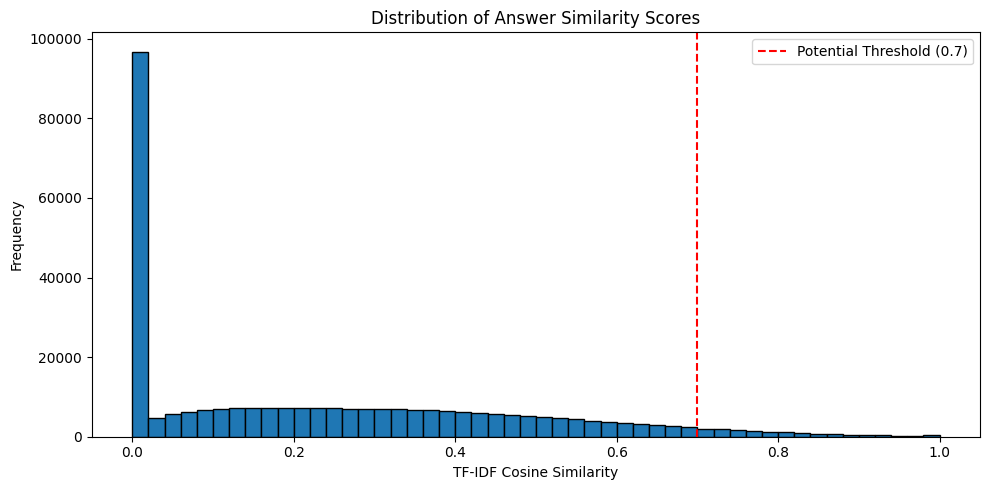


Label distribution with threshold 0.7:
label
0    289869
1     13827
Name: count, dtype: int64
Positive class: 4.6%

⚠️ Warning: Class imbalance detected (4.6% positive)
Consider adjusting THRESHOLD to achieve 30-50% positive class


In [23]:
# === LABEL CREATION: TF-IDF Cosine Similarity ===
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

print("Creating labels using TF-IDF similarity...")

# Prepare text data
model_answers = df_clean['model_answer'].fillna('').astype(str)
reference_answers = df_clean['reference_answer'].fillna('').astype(str)

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.8
)

# Fit on all answers
all_answers = pd.concat([model_answers, reference_answers])
tfidf.fit(all_answers)

# Transform both sets
model_vectors = tfidf.transform(model_answers)
reference_vectors = tfidf.transform(reference_answers)

# Compute pairwise cosine similarity
similarities = []
for i in range(len(df_clean)):
    sim = cosine_similarity(model_vectors[i], reference_vectors[i])[0][0]
    similarities.append(sim)

df_clean['answer_similarity_tfidf'] = similarities

# Analyze similarity distribution to choose threshold
print("\nSimilarity score distribution:")
print(df_clean['answer_similarity_tfidf'].describe())

# Plot distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(df_clean['answer_similarity_tfidf'], bins=50, edgecolor='black')
plt.xlabel('TF-IDF Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Answer Similarity Scores')
plt.axvline(x=0.7, color='r', linestyle='--', label='Potential Threshold (0.7)')
plt.legend()
plt.tight_layout()
plt.savefig('similarity_distribution.png')
plt.show()

# Create binary labels with threshold (adjust based on distribution)
THRESHOLD = 0.7  # Adjust this based on the histogram
df_clean['label'] = (df_clean['answer_similarity_tfidf'] >= THRESHOLD).astype(int)

print(f"\nLabel distribution with threshold {THRESHOLD}:")
print(df_clean['label'].value_counts())
print(f"Positive class: {df_clean['label'].mean()*100:.1f}%")

# If class balance is poor, adjust threshold
positive_rate = df_clean['label'].mean()
if positive_rate < 0.3 or positive_rate > 0.7:
    print(f"\n⚠️ Warning: Class imbalance detected ({positive_rate*100:.1f}% positive)")
    print("Consider adjusting THRESHOLD to achieve 30-50% positive class")



Total features extracted: 20
Feature list: ['feat_token_count', 'feat_sentence_count', 'feat_step_markers', 'feat_avg_sentence_len', 'feat_max_sentence_len', 'feat_latex_operators', 'feat_digit_ratio', 'feat_equation_signs', 'feat_operator_variety', 'feat_has_code_block', 'feat_logic_connectives', 'feat_self_corrections', 'feat_contradiction_markers', 'feat_question_overlap', 'feat_extra_numbers', 'feat_has_answer_marker', 'feat_type_token_ratio', 'feat_punctuation_density', 'feat_parentheses_balanced', 'feat_repeated_trigrams']

Feature Summary Statistics:
       feat_token_count  feat_sentence_count  feat_step_markers  \
count     303696.000000        303696.000000      303696.000000   
mean        1341.393733           116.311361           0.194036   
std         1783.219576           184.712404           2.880551   
min            0.000000             0.000000           0.000000   
25%          369.000000            30.000000           0.000000   
50%          698.000000          

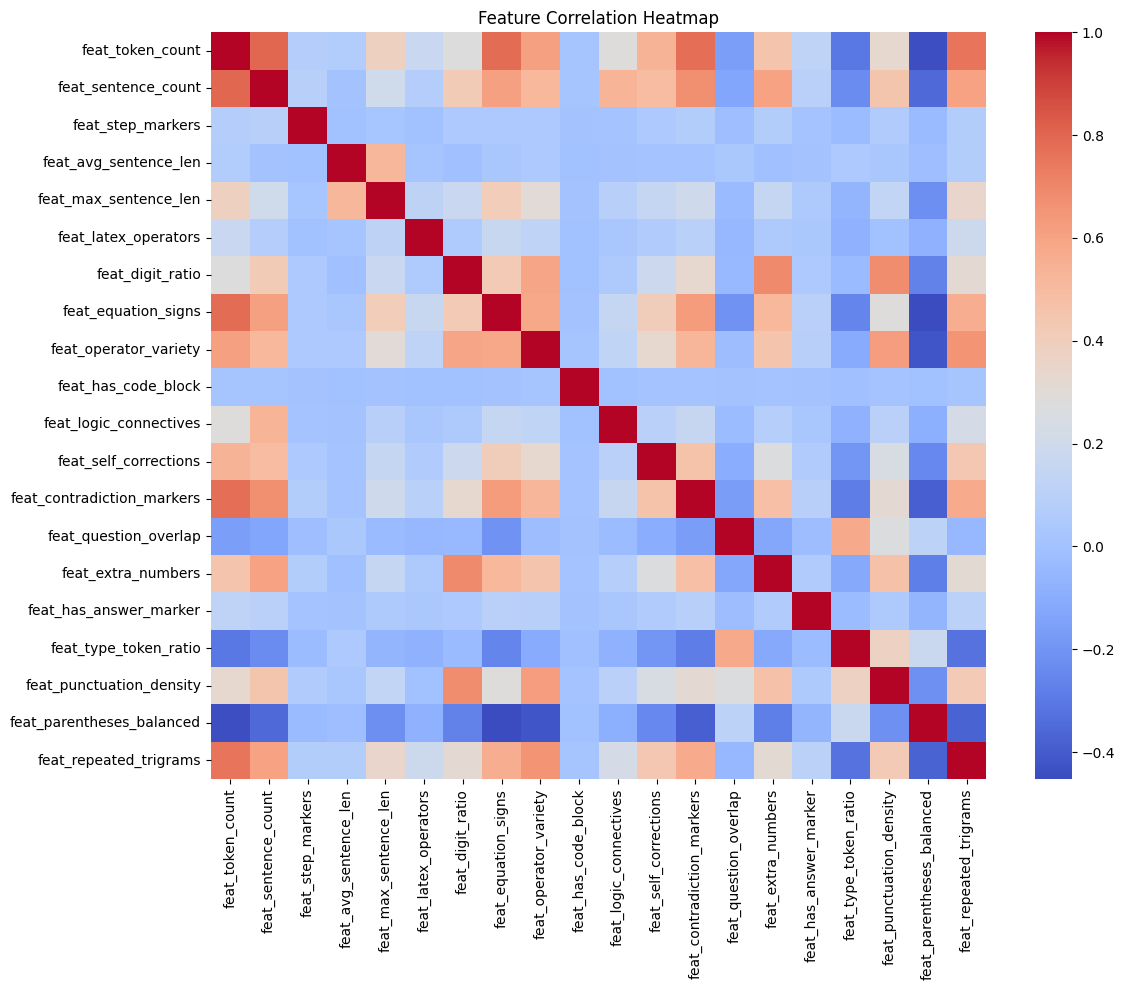

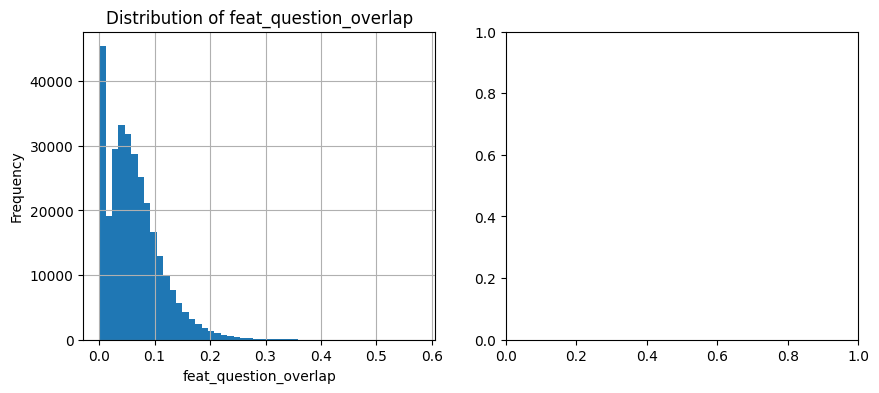

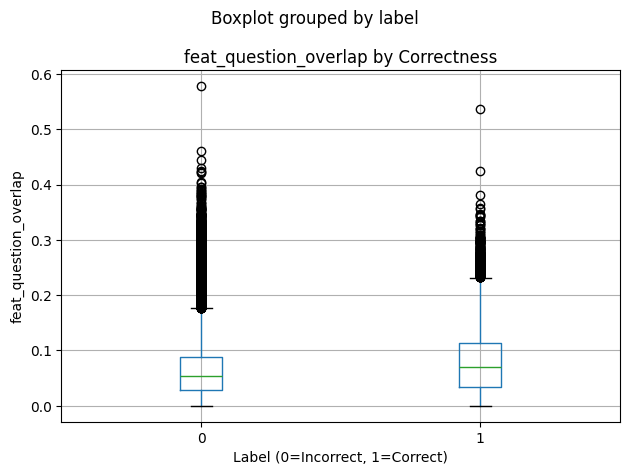

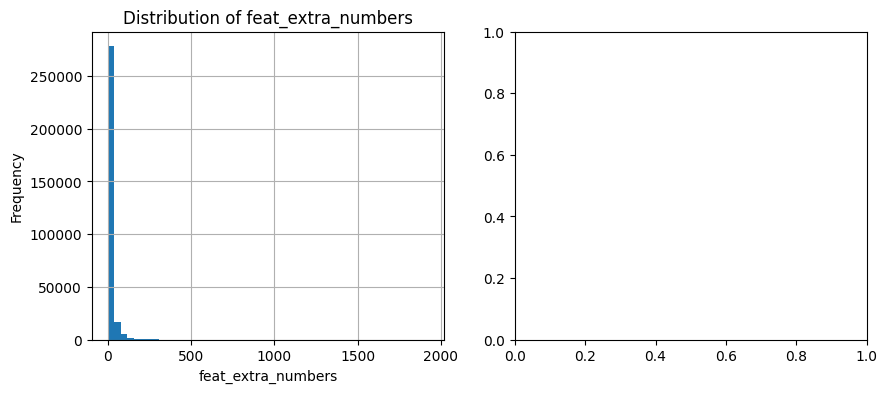

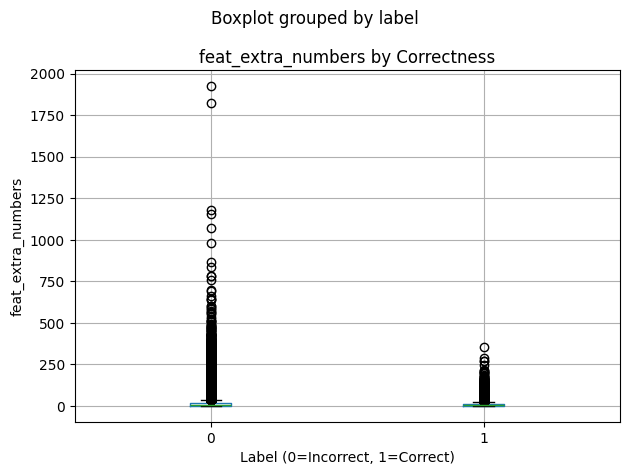

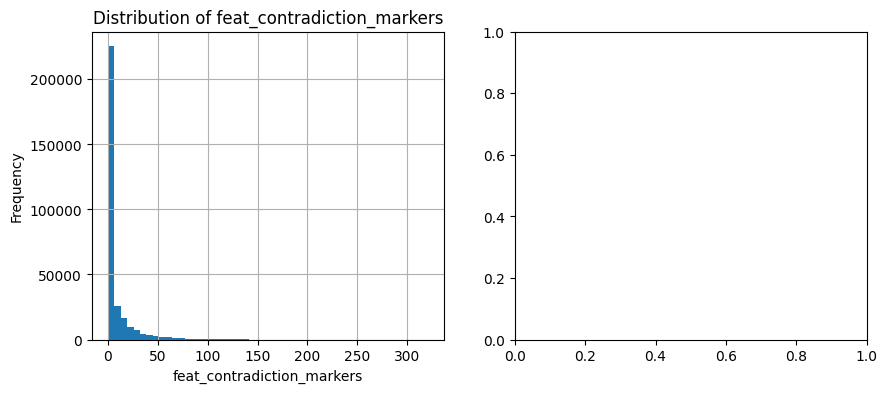

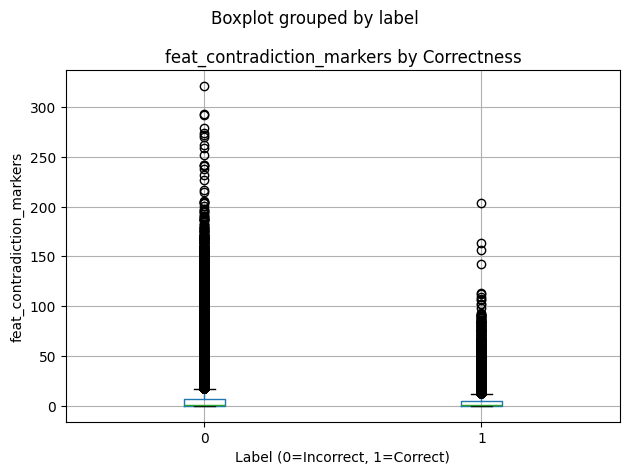

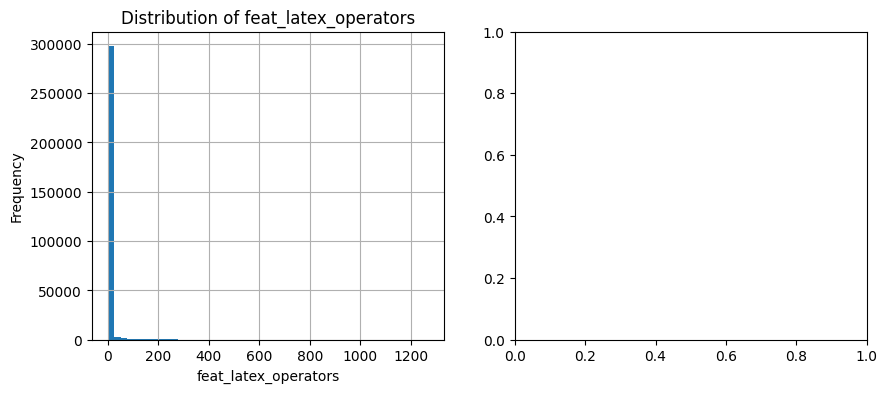

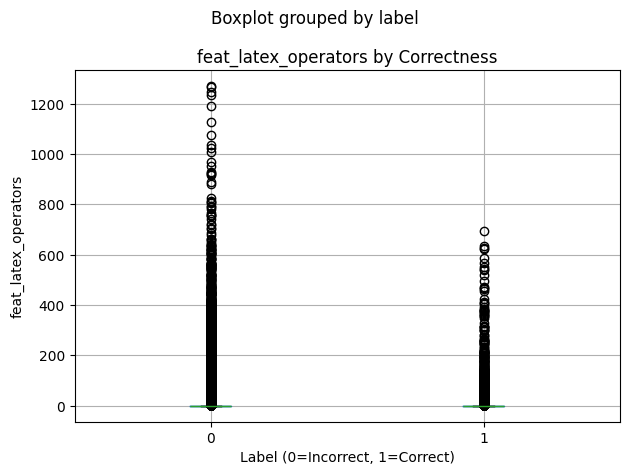

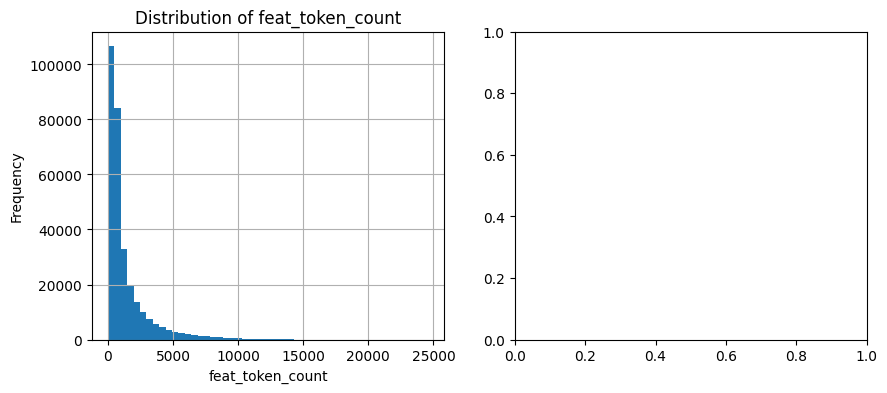

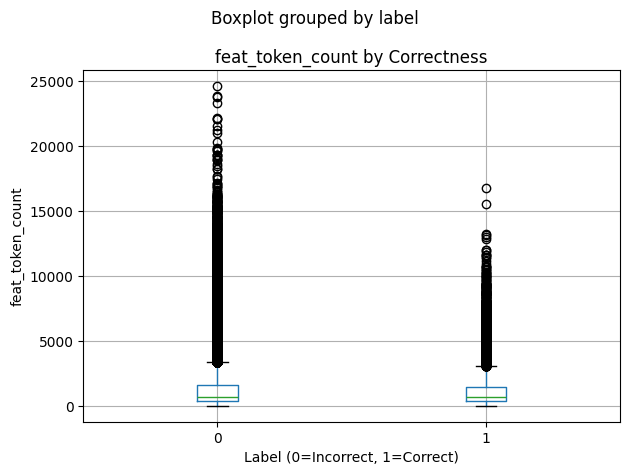

In [24]:
# === EXPLORATORY DATA ANALYSIS ===
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric feature columns (before standardization)
feature_cols = [col for col in df_clean.columns if col.startswith('feat_')]
print(f"\nTotal features extracted: {len(feature_cols)}")
print("Feature list:", feature_cols)

# Summary statistics
print("\nFeature Summary Statistics:")
print(df_clean[feature_cols].describe())

# Correlation with label
print("\nCorrelation with label:")
correlations = df_clean[feature_cols + ['label']].corr()['label'].sort_values(ascending=False)
print(correlations)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean[feature_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('feature_correlation_heatmap.png')
plt.show()

# Distribution plots for top correlated features
top_features = correlations.abs().sort_values(ascending=False)[1:6].index
for feat in top_features:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    df_clean[feat].hist(bins=50)
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feat}')
    
    plt.subplot(1, 2, 2)
    df_clean.boxplot(column=feat, by='label')
    plt.xlabel('Label (0=Incorrect, 1=Correct)')
    plt.ylabel(feat)
    plt.title(f'{feat} by Correctness')
    
    plt.tight_layout()
    plt.savefig(f'{feat}_analysis.png')
    plt.show()


In [25]:
# Detect outliers using IQR method
for feat in feature_cols:
    Q1 = df_clean[feat].quantile(0.25)
    Q3 = df_clean[feat].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df_clean[feat] < (Q1 - 1.5 * IQR)) | 
                     (df_clean[feat] > (Q3 + 1.5 * IQR))).sum()
    print(f"{feat}: {outlier_count} outliers ({outlier_count/len(df_clean)*100:.2f}%)")

# Note: We keep outliers as they may be informative (e.g., very long reasoning traces)


feat_token_count: 30713 outliers (10.11%)
feat_sentence_count: 33095 outliers (10.90%)
feat_step_markers: 11126 outliers (3.66%)
feat_avg_sentence_len: 43562 outliers (14.34%)
feat_max_sentence_len: 36191 outliers (11.92%)
feat_latex_operators: 24025 outliers (7.91%)
feat_digit_ratio: 13387 outliers (4.41%)
feat_equation_signs: 36994 outliers (12.18%)
feat_operator_variety: 0 outliers (0.00%)
feat_has_code_block: 233 outliers (0.08%)
feat_logic_connectives: 32512 outliers (10.71%)
feat_self_corrections: 35181 outliers (11.58%)
feat_contradiction_markers: 40020 outliers (13.18%)
feat_question_overlap: 7703 outliers (2.54%)
feat_extra_numbers: 28572 outliers (9.41%)
feat_has_answer_marker: 5677 outliers (1.87%)
feat_type_token_ratio: 36 outliers (0.01%)
feat_punctuation_density: 47924 outliers (15.78%)
feat_parentheses_balanced: 38584 outliers (12.70%)
feat_repeated_trigrams: 3695 outliers (1.22%)


In [26]:
# === STANDARDIZATION (Z-SCORE) ===
print("\nStandardizing features...")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[feature_cols] = scaler.fit_transform(df_clean[feature_cols])

# Save scaler for later use in modeling
import joblib
joblib.dump(scaler, 'feature_scaler.pkl')
print("✓ Scaler saved to 'feature_scaler.pkl'")



Standardizing features...
✓ Scaler saved to 'feature_scaler.pkl'


In [27]:
# Group split by model_name (as specified in proposal)
unique_models = df_clean['model_name'].unique()
import numpy as np
np.random.seed(42)
np.random.shuffle(unique_models)

n_models = len(unique_models)
train_models = unique_models[:int(0.7 * n_models)]
val_models = unique_models[int(0.7 * n_models):int(0.85 * n_models)]
test_models = unique_models[int(0.85 * n_models):]

train_df = df_clean[df_clean['model_name'].isin(train_models)]
val_df = df_clean[df_clean['model_name'].isin(val_models)]
test_df = df_clean[df_clean['model_name'].isin(test_models)]

print(f"\nTrain: {len(train_df)} ({len(train_df)/len(df_clean)*100:.1f}%)")
print(f"Val: {len(val_df)} ({len(val_df)/len(df_clean)*100:.1f}%)")
print(f"Test: {len(test_df)} ({len(test_df)/len(df_clean)*100:.1f}%)")



Train: 291041 (95.8%)
Val: 5819 (1.9%)
Test: 6836 (2.3%)


In [28]:
# Save processed datasets
train_df.to_csv('train_dataset.csv', index=False)
val_df.to_csv('val_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

# Also save a combined version
df_clean.to_csv('full_cleaned_dataset.csv', index=False)

print("\nFinal dataset characteristics:")
print(f"Total samples: {len(df_clean)}")
print(f"Features: {len(feature_cols)}")
print(f"Label distribution: {df_clean['label'].value_counts(normalize=True).to_dict()}")



Final dataset characteristics:
Total samples: 303696
Features: 20
Label distribution: {0: 0.9544709182867077, 1: 0.04552908171329224}


In [34]:
# === TRAIN WORD2VEC EMBEDDINGS ===
print("Training Word2Vec embeddings...")

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Prepare corpus: all reasoning traces, questions, and answers
corpus_texts = []
for col in ['model_reasoning', 'question', 'model_answer', 'reference_answer']:
    corpus_texts.extend(df_clean[col].fillna('').astype(str).tolist())

# Tokenize corpus
print("Tokenizing corpus...")
tokenized_corpus = [simple_preprocess(text, deacc=True) for text in corpus_texts]

# Train Word2Vec model
print("Training Word2Vec model (this may take several minutes)...")
w2v_model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,
    epochs=10,
    workers=4,
    negative=5,
    seed=42
)

print(f"✓ Word2Vec trained with vocabulary size: {len(w2v_model.wv)}")

# Save model for reproducibility
w2v_model.save('word2vec_cot.model')
print("✓ Word2Vec model saved to 'word2vec_cot.model'")


Training Word2Vec embeddings...


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# === FEATURE FAMILY 6: Semantic Features (from Word2Vec) ===
print("Extracting Feature Family 6: Semantic Features...")

def text_to_embedding(text, model):
    """Convert text to average word embedding"""
    words = simple_preprocess(str(text), deacc=True)
    valid_words = [word for word in words if word in model.wv]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[word] for word in valid_words], axis=0)

def cosine_sim_embeddings(vec1, vec2):
    """Cosine similarity between two vectors"""
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0
    return np.dot(vec1, vec2) / (norm1 * norm2)

# Compute embeddings (this is slow, so we'll use tqdm for progress)
print("Computing embeddings for all texts...")
from tqdm import tqdm
tqdm.pandas()

# 1. Answer semantic similarity
print("1/5: Computing answer semantic similarity...")
model_answer_embs = df_clean['model_answer'].progress_apply(lambda x: text_to_embedding(x, w2v_model))
reference_answer_embs = df_clean['reference_answer'].progress_apply(lambda x: text_to_embedding(x, w2v_model))
df_clean['feat_answer_semantic_sim'] = [
    cosine_sim_embeddings(m, r) for m, r in zip(model_answer_embs, reference_answer_embs)
]

# 2. Question-reasoning alignment
print("2/5: Computing question-reasoning similarity...")
question_embs = df_clean['question'].progress_apply(lambda x: text_to_embedding(x, w2v_model))
reasoning_embs = df_clean['model_reasoning'].progress_apply(lambda x: text_to_embedding(x, w2v_model))
df_clean['feat_question_reasoning_sim'] = [
    cosine_sim_embeddings(q, r) for q, r in zip(question_embs, reasoning_embs)
]

# 3. Reasoning-answer consistency
print("3/5: Computing reasoning-answer consistency...")
df_clean['feat_reasoning_answer_sim'] = [
    cosine_sim_embeddings(r, a) for r, a in zip(reasoning_embs, model_answer_embs)
]

# 4. Reasoning vocabulary coverage
print("4/5: Computing vocabulary coverage...")
def vocab_coverage(text, model):
    words = simple_preprocess(str(text), deacc=True)
    if not words:
        return 0
    valid_count = sum(1 for word in words if word in model.wv)
    return valid_count / len(words)

df_clean['feat_reasoning_vocab_coverage'] = df_clean['model_reasoning'].progress_apply(
    lambda x: vocab_coverage(x, w2v_model)
)

# 5. Semantic diversity (average pairwise distance)
print("5/5: Computing semantic diversity...")
def semantic_diversity(text, model):
    words = simple_preprocess(str(text), deacc=True)
    valid_words = [word for word in words if word in model.wv]
    if len(valid_words) < 2:
        return 0
    # Sample up to 50 words to avoid quadratic explosion
    sampled = np.random.choice(valid_words, size=min(50, len(valid_words)), replace=False)
    embeddings = [model.wv[word] for word in sampled]
    distances = []
    for i in range(len(embeddings)):
        for j in range(i+1, len(embeddings)):
            dist = np.linalg.norm(embeddings[i] - embeddings[j])
            distances.append(dist)
    return np.mean(distances) if distances else 0

np.random.seed(42)
df_clean['feat_semantic_diversity'] = df_clean['model_reasoning'].progress_apply(
    lambda x: semantic_diversity(x, w2v_model)
)

print(f"✓ Created {5} semantic features")
